# German Credit Analysis

## Context

When a bank receives a loan application, based on the applicant’s profile the bank has to decide whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision –

If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank
To minimize this loss HRE bank wants to automate this process using a predictive model, that will predict if a customer is at risk of making a default or not based on the customer’s demographic and socio-economic profiles

You as a Data scientist at HRE bank has been assigned the work of building a predictive model that will predict if a customer is at risk of default or not

## Objective

The objective is to build a model to predict whether a person would default or not. In this dataset, the target variable is 'Risk'.

## Dataset Description
- Age (Numeric: Age in years)
- Sex (Categories: male, female)
- Job (Categories : 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (Categories: own, rent, or free)
- Saving accounts (Categories: little, moderate, quite rich, rich)
- Checking account (Categories: little, moderate, rich)
- Credit amount (Numeric: Amount of credit in DM - Deutsche Mark)
- Duration (Numeric: Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Person is at risk(defaulter))


# Step 0

Given the nature of the problem (binary classification) and the dataset (combination of numerical and categorical features), the following machine learning models are well-suited:

1. Logistic Regression
Advantages: Simple to interpret, efficient to train, and often provides good baseline performance.
Disadvantages: May not handle complex non-linear relationships well.

2. Decision Trees and Random Forests
Advantages: Can handle both numerical and categorical features, can capture non-linear relationships, and are relatively interpretable.
Disadvantages: Can overfit, especially with deep trees, and may be sensitive to small changes in the data.

3. Gradient Boosting Machines (GBM)
Advantages: Highly accurate, can handle complex relationships, and are often state-of-the-art for many classification problems.
Disadvantages: Can be computationally expensive to train, and may be difficult to interpret.

4. Support Vector Machines (SVM)
Advantages: Effective for high-dimensional data and can handle non-linear relationships using kernels.
Disadvantages: Can be computationally expensive to train, especially with large datasets, and may be difficult to interpret.

5. Neural Networks
Advantages: Can handle complex non-linear relationships and are highly flexible.
Disadvantages: Can be computationally expensive to train, require careful hyperparameter tuning, and may be difficult to interpret.



---



# Import Libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# load the Data

In [2]:
# Load Data
german_credit = pd.read_csv("German_Credit.csv")

# Copy the data

In [3]:
data = german_credit.copy()

# Overview of the Data

In [4]:
# Shape of data
data.shape

(1000, 10)

- 10 rows with a 1,000 columns
- Small dataset

In [5]:
# First few rows
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [6]:
# Last few rows
data.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,1
999,27,male,2,own,moderate,moderate,4576,45,car,0


Insight

- Having NaN values present
- Purpose column can have multiple entries
- Saving accounts & checking accounts do not show number values, only categories (need more information)

In [7]:
# Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Insight

- 5 columns have unt64 and 5 have object data types
- Missing values for Saving accounts & checking accounts


In [8]:
# Check duplicate values
data.duplicated().sum()

0

In [9]:
# Check percent of missing values
round(data.isna().sum() / len(data) * 100, 2)

,0
Age,0.000
Sex,0.000
Job,0.000
Housing,0.000
Saving accounts,18.300
Checking account,39.400
Credit amount,0.000
Duration,0.000
Purpose,0.000
Risk,0.000


Insight

- Saving account missing 18% of entries
- Checking account misisng 39% entries

In [10]:
# check unique values
data.nunique()

,0
Age,53
Sex,2
Job,4
Housing,3
Saving accounts,4
Checking account,3
Credit amount,921
Duration,33
Purpose,8
Risk,2


Insight

- Age only has 53 unique values, majority of customers might be of similiar age
- Three continious variables - Age, Credit Amount and Duration
- All other cariables are categorical  

In [11]:
# Duplicates
data.duplicated().sum()

0

In [12]:
# 5 point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.000,35.546,11.375,19.000,27.000,33.000,42.000,75.000
Job,1000.000,1.904,0.654,0.000,2.000,2.000,2.000,3.000
Credit amount,1000.000,3271.258,2822.737,250.000,1365.500,2319.500,3972.250,18424.000
Duration,1000.000,20.903,12.059,4.000,12.000,18.000,24.000,72.000
Risk,1000.000,0.300,0.458,0.000,0.000,0.000,1.000,1.000


Insight

- Age
  - Mean 35 years old and median is 33 most customers are under 35 years old. youngest is 19 and oldest is 75.

- Job
  - range of 0 to 3 jobs, majority have 2

- Credit Amount
  - mean is \$3271, ranges from $250 to \$18,424. 75% are under \$3972

- Duration
  - Mean duration is 21 months. Ranges from 4 to 72 months. 75% is 24 months.

- Risk
  - The mean is 0.3, indicating that a significant portion are high risk

In [13]:
# Checking the value count for each category of categorical variables
cat_col = [
    "Sex",
    "Job",
    "Housing",
    "Saving accounts",
    "Checking account",
    "Purpose",
    "Risk"
]

# Print number count for each unique value
for column in cat_col:
    print(f"Column: {column}")
    print(data[column].value_counts())
    print("-" * 40)

Column: Sex
Sex
male      690
female    310
Name: count, dtype: int64
----------------------------------------
Column: Job
Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64
----------------------------------------
Column: Housing
Housing
own     713
rent    179
free    108
Name: count, dtype: int64
----------------------------------------
Column: Saving accounts
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
----------------------------------------
Column: Checking account
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64
----------------------------------------
Column: Purpose
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64
----------------------------------------


Insight

**Sex**

- Male applicants significantly outnumber female applicants (imbalance in the dataset).

**Job:**

- Most applicants have skilled jobs, followed by unskilled and resident. This indicates that the dataset primarily represents individuals with stable employment.

- A relatively small number of applicants are unskilled and non-resident.

**Housing:**
- The majority of applicants own their homes, suggesting a level of financial stability.

- Renting is the second most common housing situation

- free housing (possibly indicating living with family or friends).

Saving accounts:

- The most common saving account status is little savings, suggesting that a significant portion of applicants have limited financial resources.

- Moderate savings are less common, while quite rich and rich categories indicate a smaller group with substantial savings.

Checking account:

- Little and moderate checking account balances are the most frequent, suggesting that a majority of applicants have limited or average financial activity.

- Rich checking accounts are less common, indicating a smaller group with higher financial activity or larger deposits.

Purpose:

- Car is the most common reason for credit applications, followed by radio/TV and furniture/equipment. This suggests that consumer goods are the primary drivers of credit demand.
Business and education are less common purposes, indicating that credit is less frequently used for professional or educational purposes.

Risk:

- Non-defaulters (0) outnumber defaulters (1), suggesting that the majority of applicants have been responsible in repaying their loans.
However, a significant proportion of applicants have been classified as defaulters, indicating a need for further analysis to understand the factors contributing to default risk.

- Imbalanced classes



---



# EDA

## Function for EDA Analysis

- Box plots and histograms will give a better understanding of how the data is distributed.

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate Analysis


In [15]:
# Pull up data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


## Observations on Age

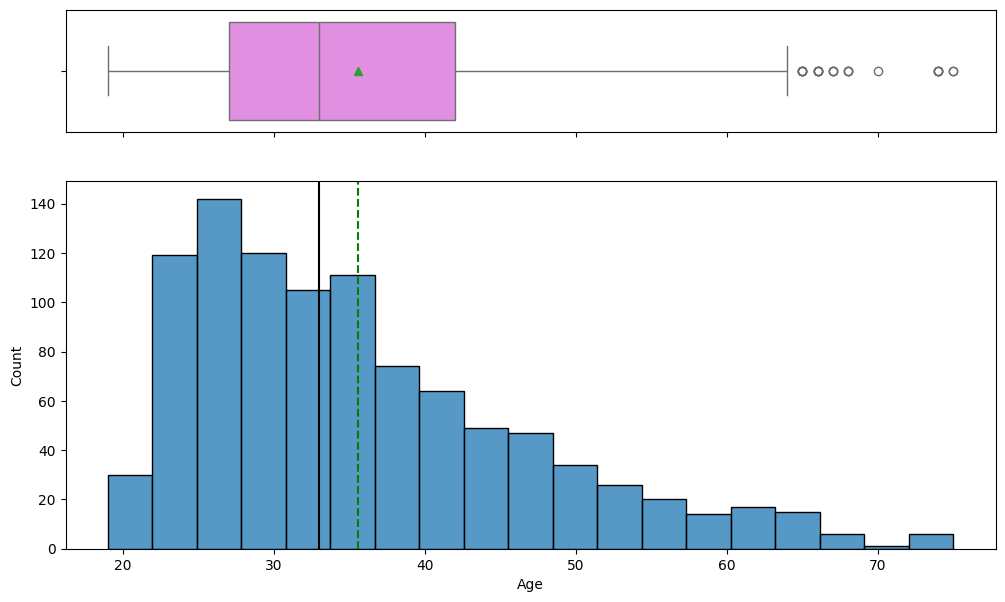

In [16]:
histogram_boxplot(data, "Age")

- The distribution of age is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

## Observation on Job

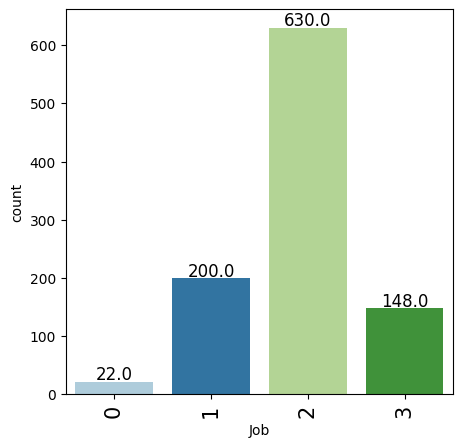

In [24]:
labeled_barplot(data, "Job")

- Majority of the customers i.e. 63% fall into the skilled category.
- There are only approx 15% of customers that lie in the highly skilled category which makes sense as these may be the persons with high education or highly experienced.
- There are very few observations, approx 22%, with 0 or 1 job category.

## Observation on Credit Amount

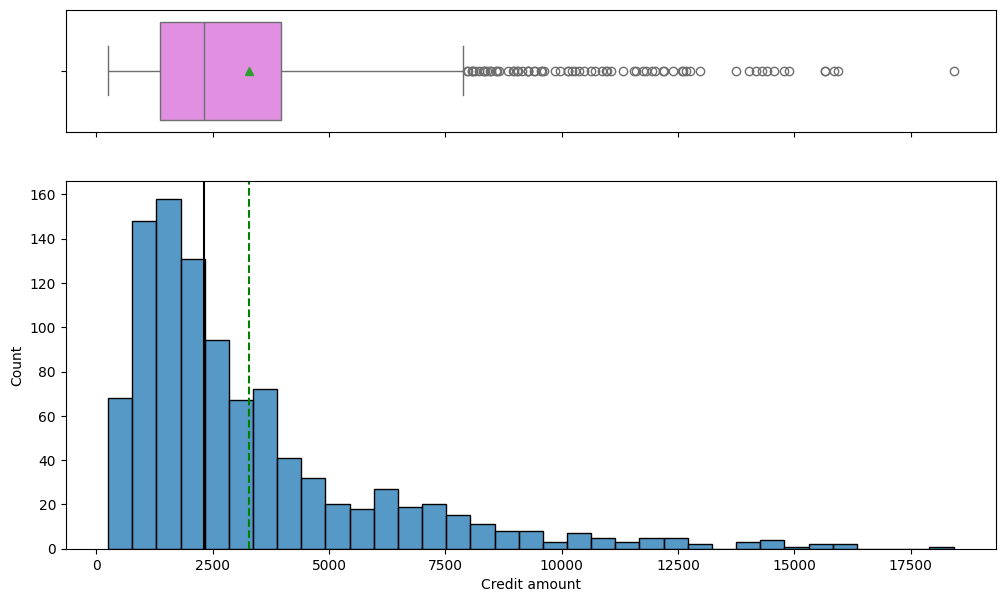

In [20]:
histogram_boxplot(data, "Credit amount")

Insight

- The distribution of the credit amount is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

## Observation on Duration

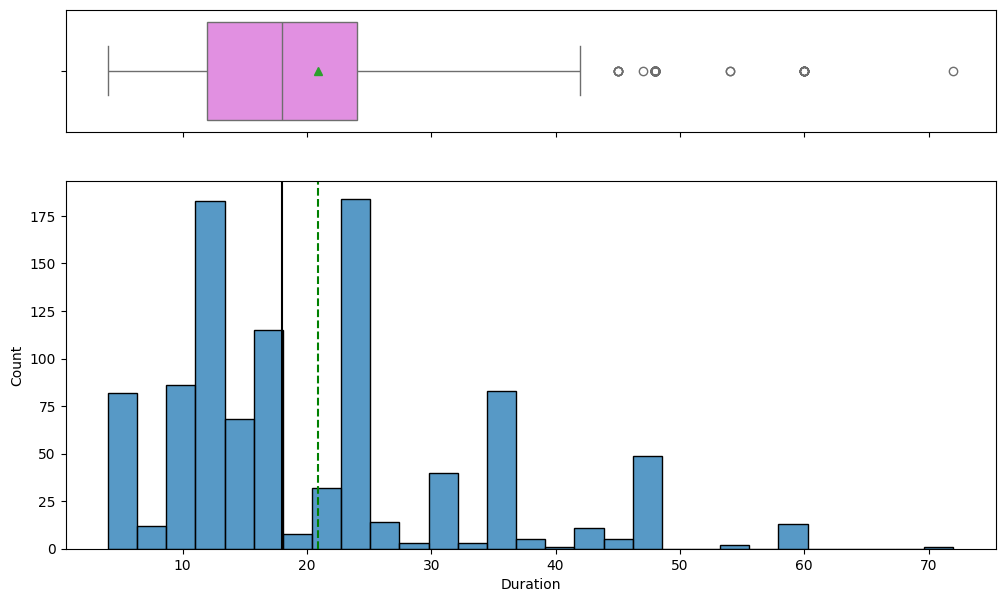

In [22]:
histogram_boxplot(data, "Duration")

## Observation on Risk

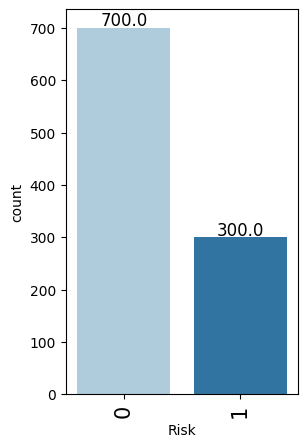

In [25]:
labeled_barplot(data, "Risk")

Catagorical Columns